<a href="https://colab.research.google.com/github/Khayladhr/Data-Science-Project/blob/main/Seoulbike_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression

In [ ]:
!wget https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand

--2025-12-16 10:56:59--  https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 154800 (151K) [text/html]
Saving to: ‘seoul+bike+sharing+demand’

seoul+bike+sharing+ 100%[===================>] 151.17K   305KB/s    in 0.5s    

2025-12-16 10:57:00 (305 KB/s) - ‘seoul+bike+sharing+demand’ saved [154800/154800]



In [ ]:
df = pd.read_csv(
    'SeoulBikeData.csv',
    encoding='latin1'
).drop(['Date', 'Holiday', 'Seasons'], axis=1)


In [ ]:
dataset_cols = ["bike_count" , "hour" , "temp", "humidity", "wind", "visibility", "dew_pt_temp", "radiation", "rain", "snow", "functional"]
df.columns = dataset_cols
df["functional"] = (df["functional"] == "Yes").astype(int)
df = df[df["hour"] == 12]
df = df.drop("hour", axis=1)

In [ ]:
df.head()

,bike_count,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,0
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,0
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,0
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,0
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,0


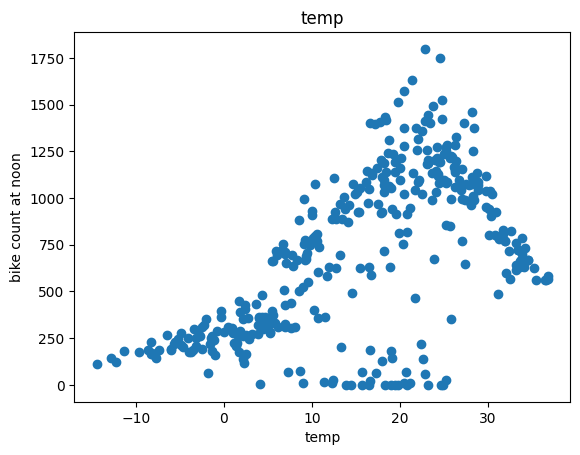

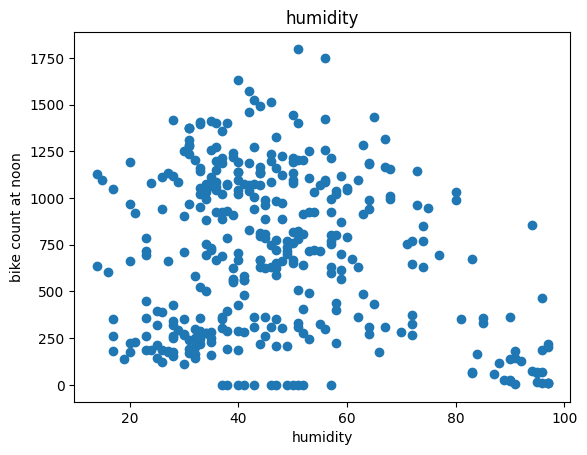

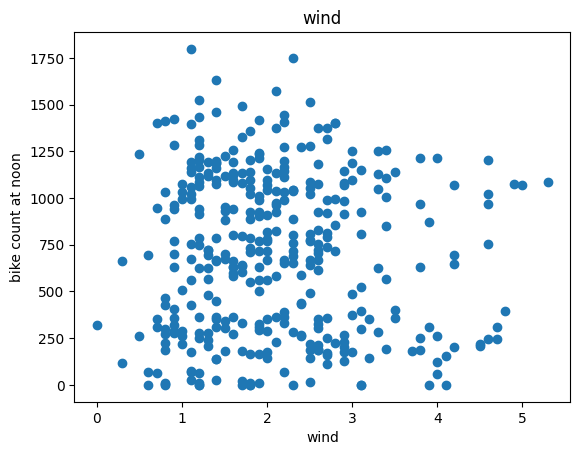

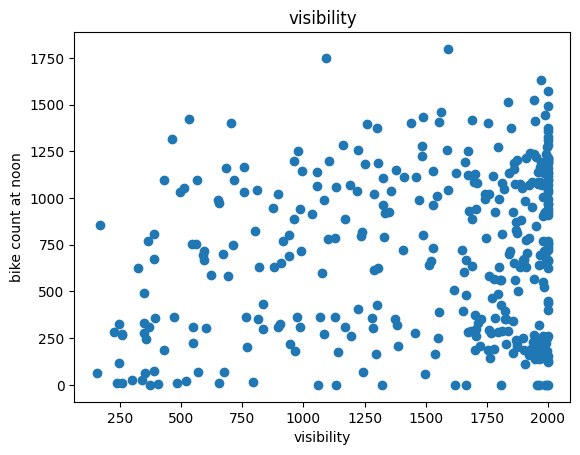

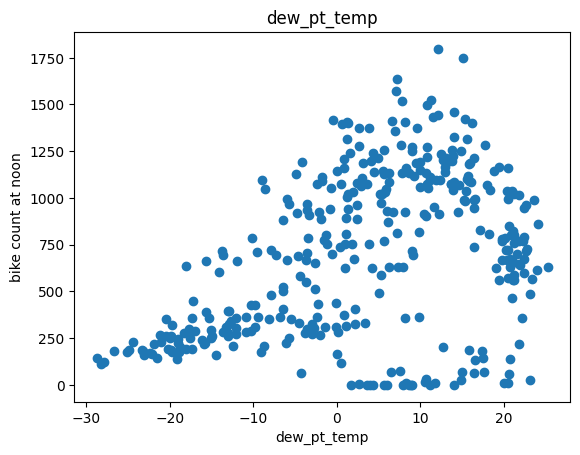

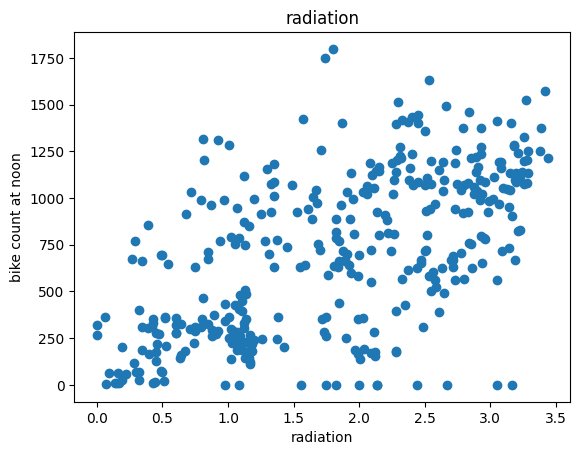

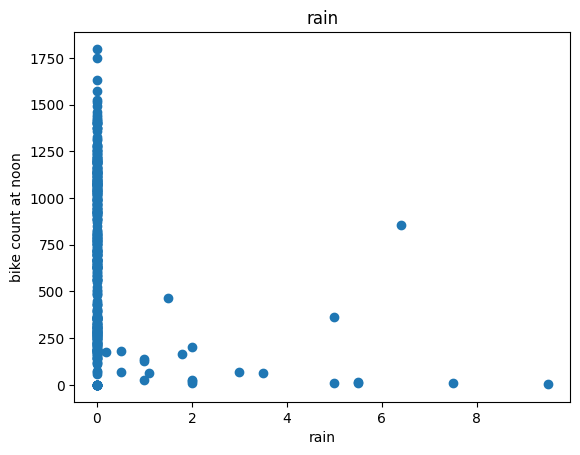

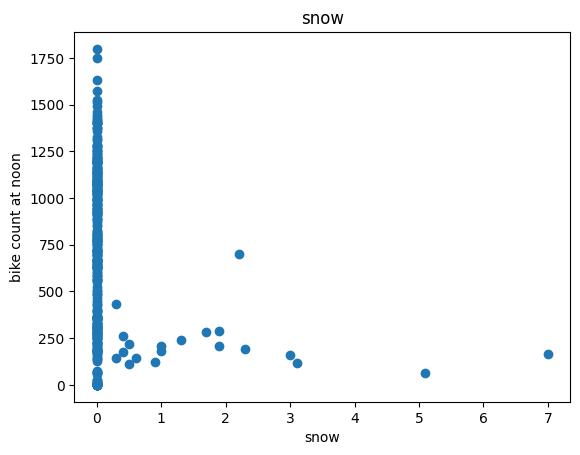

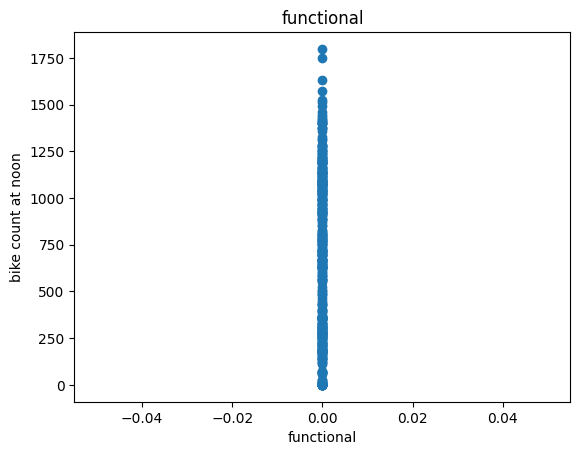

In [ ]:
for label in df.columns[1:]:
  plt.scatter(df[label], df["bike_count"])
  plt.title(label)
  plt.ylabel("bike count at noon")
  plt.xlabel(label)
  plt.show()

In [ ]:
df = df.drop(["wind", "visibility", "functional"], axis=1)

In [ ]:
df.head()

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


# Train, Valid, Test

In [ ]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
def get_xy(dataframe, y_label, x_labels=None):
  dataframe = copy.deepcopy(dataframe)
  if not x_labels:
    x = dataframe[[c for c in dataframe.columns if c != y_label]].values
  else:
    if len(x_labels) == 1:
      x = dataframe[x_labels[0]].values.reshape(-1, 1)
    else:
      x = dataframe[x_labels].values

  y = dataframe[y_label].values.reshape(-1, 1)
  data = np.hstack((x, y))
  return x, y

In [ ]:
x_train_temp, y_train_temp = get_xy(train, "bike_count", x_labels=["temp"])
x_val_temp, y_val_temp = get_xy(val, "bike_count", x_labels=["temp"])
x_test_temp, y_test_temp = get_xy(test, "bike_count", x_labels=["temp"])

In [ ]:
temp_reg = LinearRegression()
temp_reg.fit(x_train_temp, y_train_temp)

LinearRegression()

In [ ]:
print(temp_reg.coef_, temp_reg.intercept_)

[[19.98791225]] [387.25832366]


In [ ]:
temp_reg.score(x_train_temp, y_train_temp)

0.34387258749640803

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


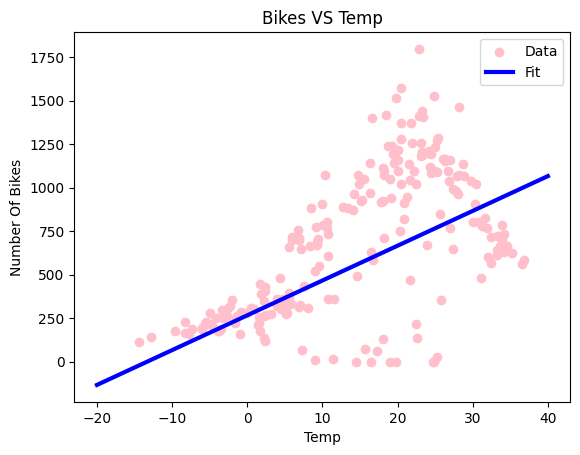

In [ ]:
plt.scatter(x_train_temp, y_train_temp, label="Data", color="pink")
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_nn_model.predict(np.array(x).reshape(-1, 1)), label="Fit", color="Blue", linewidth=3)
plt.legend()
plt.title("Bikes VS Temp")
plt.ylabel("Number Of Bikes")
plt.xlabel("Temp")
plt.show()

# Multiple Linear Regression

In [ ]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

x_cols = [c for c in df.columns if c != "bike_count"]
x_train_all, y_train_all = get_xy(train, "bike_count", x_labels=x_cols)
x_val_all, y_val_all = get_xy(val, "bike_count", x_labels=x_cols)
x_test_all, y_test_all = get_xy(test, "bike_count", x_labels=x_cols)

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
all_reg = LinearRegression()
all_reg.fit(x_train_all, y_train_all)

LinearRegression()

In [ ]:
all_reg.score(x_test_all, y_test_all)

0.48366604861627405

In [ ]:
y_pred_lr = all_reg.predict(x_test_all)

# Regression with Neural Net

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  plt.legend()
  plt.grid(True)
  plt.show()

In [ ]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=[1,], axis=None)
temp_normalizer.adapt(x_train_temp.reshape(-1))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
temp_nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(1)
])

In [ ]:
temp_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss="mean_squared_error")

In [ ]:
history = temp_nn_model.fit(
    x_train_temp.reshape(-1), y_train_temp,
    verbose=0,
    epochs=1000,
    validation_data=(x_val_temp, y_val_temp)
)

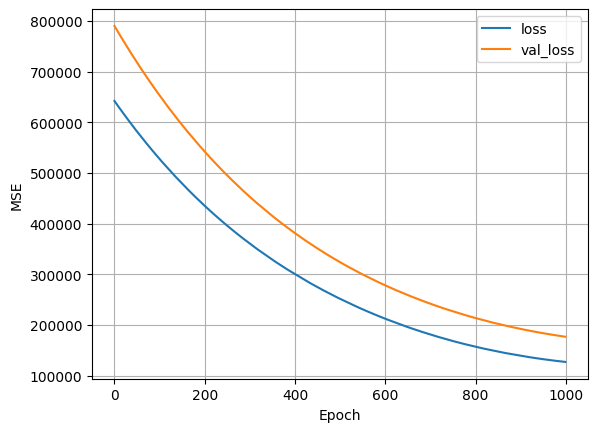

In [ ]:
plot_loss(history)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


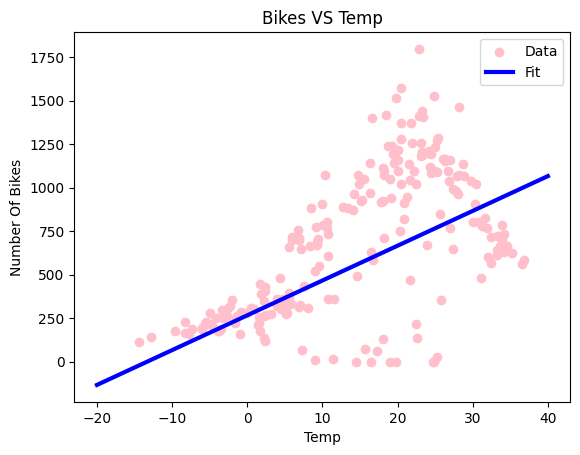

In [ ]:
plt.scatter(x_train_temp, y_train_temp, label="Data", color="pink")
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_.predict(np.array(x).reshape(-1, 1)), label="Fit", color="Blue", linewidth=3)
plt.legend()
plt.title("Bikes VS Temp")
plt.ylabel("Number Of Bikes")
plt.xlabel("Temp")
plt.show()

# Neural Net

In [ ]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=[1,], axis=None)
temp_normalizer.adapt(x_train_temp.reshape(-1))

nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(1)
])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss="mean_squared_error")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
history = nn_model.fit(
    x_train_temp, y_train_temp,
    validation_data=(x_val_temp, y_val_temp),
    verbose=0,epochs=100
)

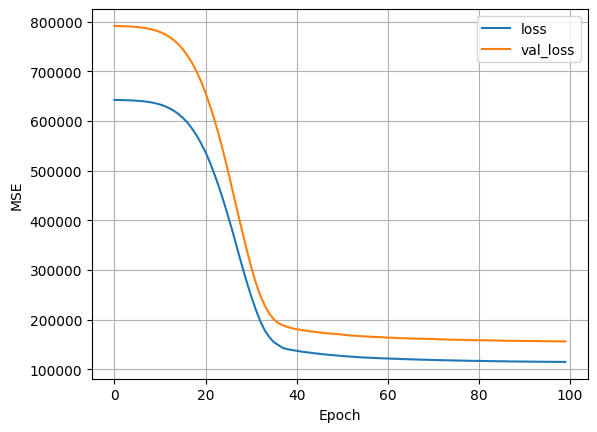

In [ ]:
plot_loss(history)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


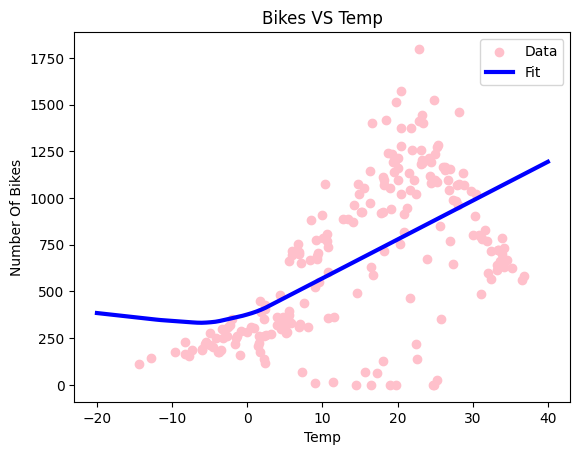

In [ ]:
plt.scatter(x_train_temp, y_train_temp, label="Data", color="pink")
x = tf.linspace(-20, 40, 100)
plt.plot(x, nn_model.predict(np.array(x).reshape(-1, 1)), label="Fit", color="Blue", linewidth=3)
plt.legend()
plt.title("Bikes VS Temp")
plt.ylabel("Number Of Bikes")
plt.xlabel("Temp")
plt.show()

In [ ]:
all_normalizer = tf.keras.layers.Normalization(input_shape=[6,], axis=-1)
all_normalizer.adapt(x_train_all)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
nn_model = tf.keras.Sequential([
    all_normalizer,
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(1)
])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss="mean_squared_error")

In [ ]:
n_features = x_train_all.shape[1]

nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(n_features,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
nn_model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss='mse'
)

history = nn_model.fit(
    x_train_all, y_train_all,
    validation_data=(x_val_all, y_val_all),
    epochs=100,
    verbose=0
)


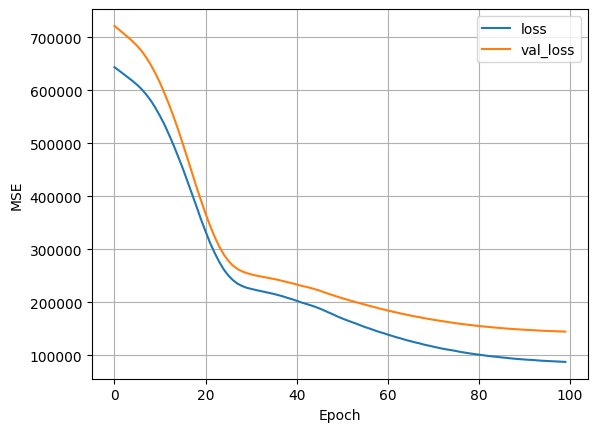

In [ ]:
plot_loss(history)

# Calculate the MSE for linear reg and nn

In [ ]:
y_pred_lr = all_reg.predict(x_test_all)
y_pred_nn = nn_model.predict(x_test_all)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [ ]:
def MSE(y_pred, y_real):
  return np.square(np.subtract(y_pred, y_real)).mean()

In [ ]:
MSE(y_pred_nn, y_test_all)

np.float64(97709.59957261993)

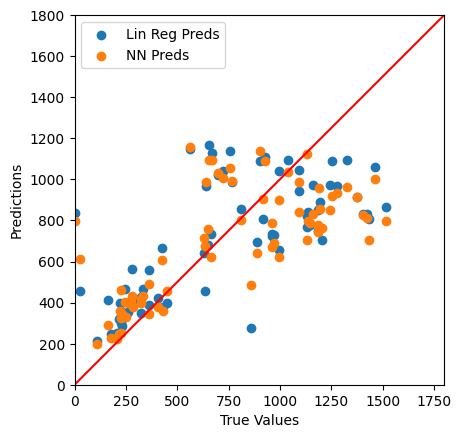

In [ ]:
ax = plt.axes(aspect='equal')
plt.scatter(y_test_all, y_pred_lr, label="Lin Reg Preds")
plt.scatter(y_test_all, y_pred_nn, label="NN Preds")
plt.xlabel("True Values")
plt.ylabel("Predictions")
lims = [0, 1800]
plt.xlim(lims)
plt.ylim(lims)
plt.legend()
_ = plt.plot(lims, lims, c="red")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
cols = ["area", "perimeter", "compactness", "length",
        "width", "asymmetry", "groove", "class"]

df = pd.read_csv(
    "seeds_dataset.txt", names=cols, sep="\s+")

<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-2694864388.py:5: SyntaxWarning: invalid escape sequence '\s'
  "seeds_dataset.txt", names=cols, sep="\s+")


In [ ]:
df.head()

,area,perimeter,compactness,length,width,asymmetry,groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


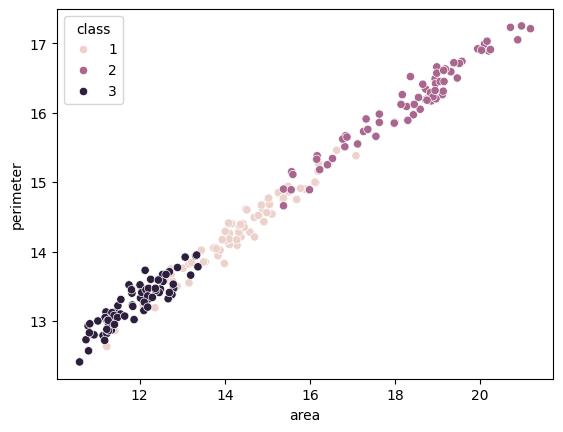

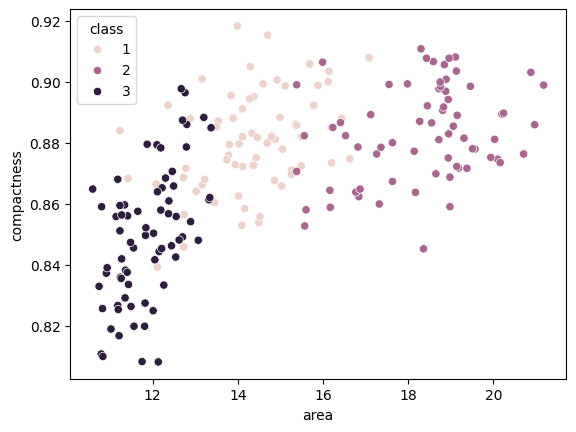

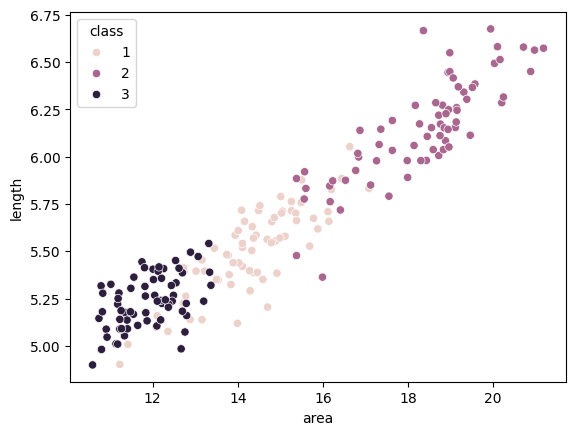

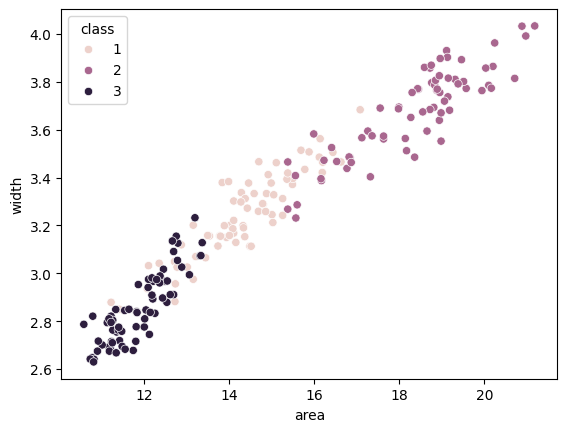

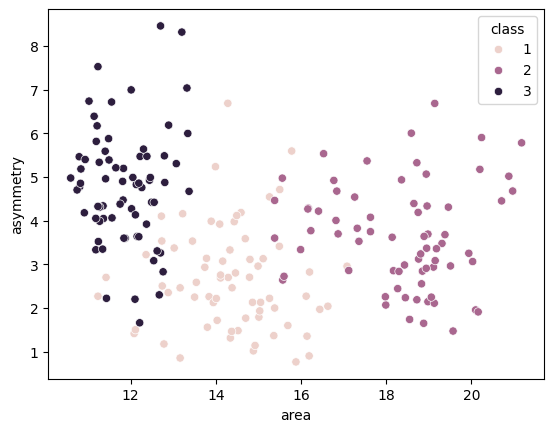

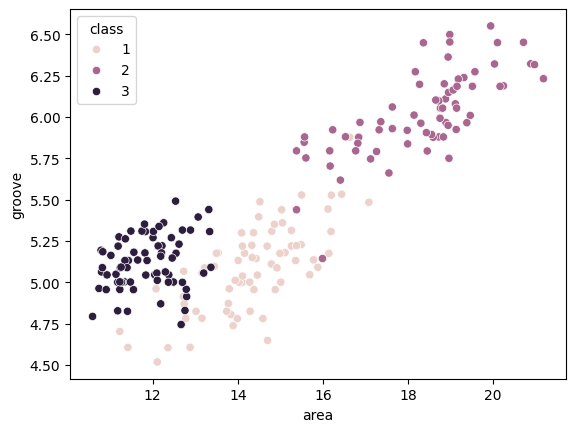

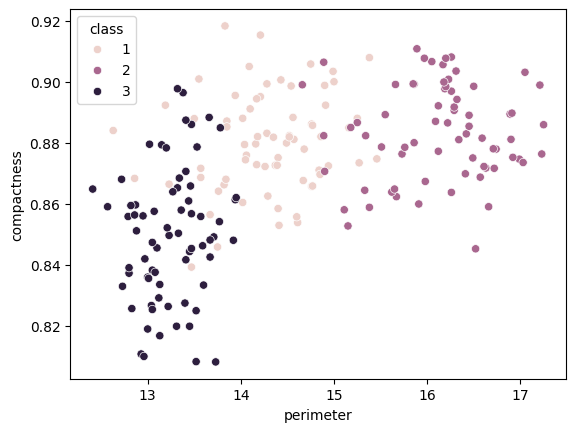

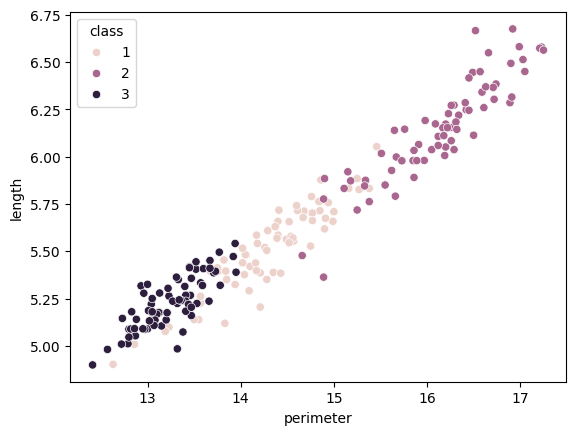

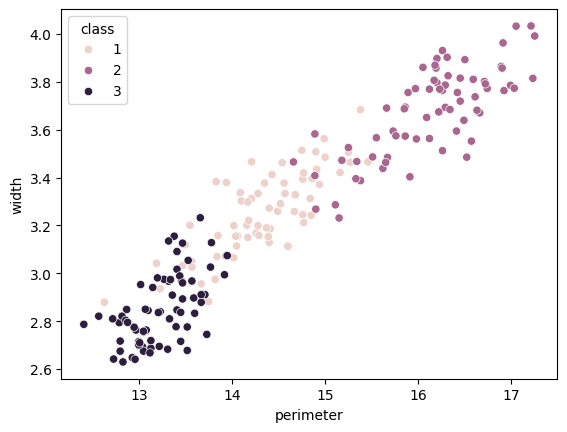

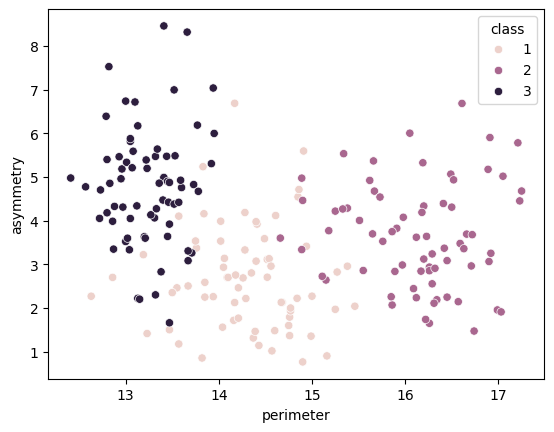

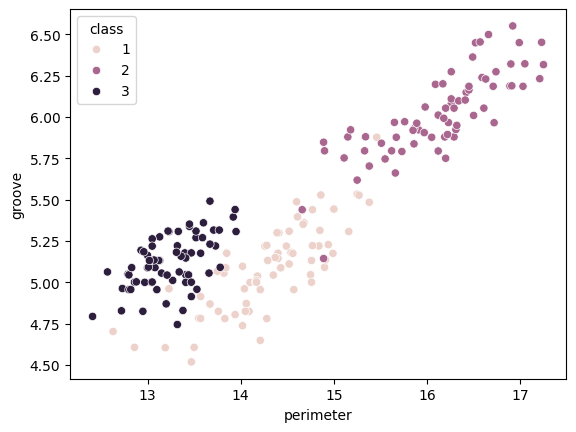

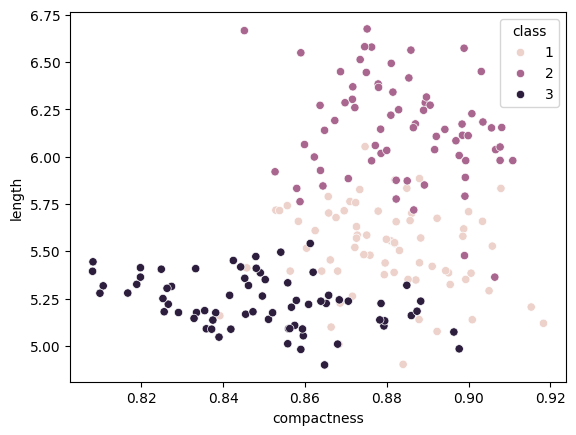

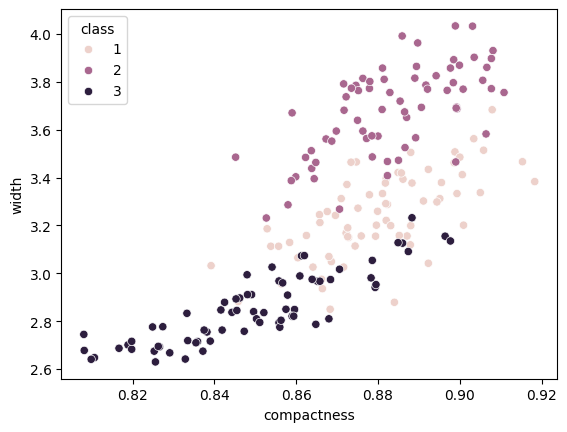

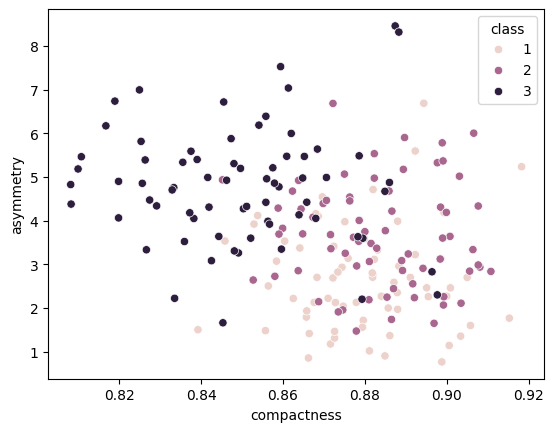

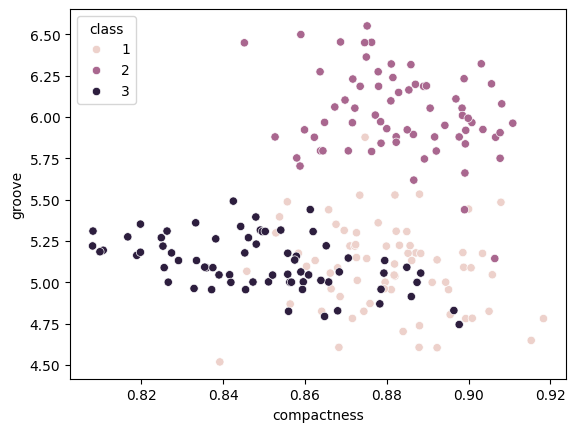

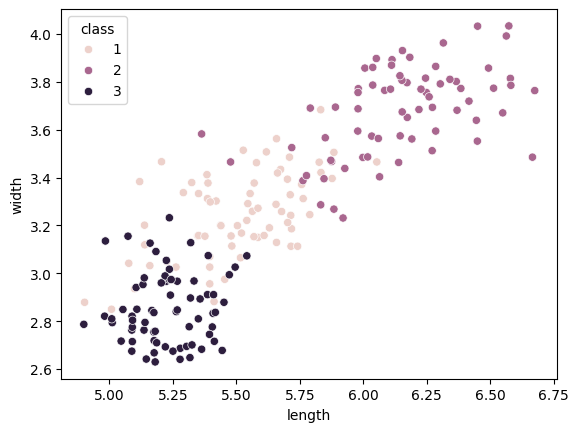

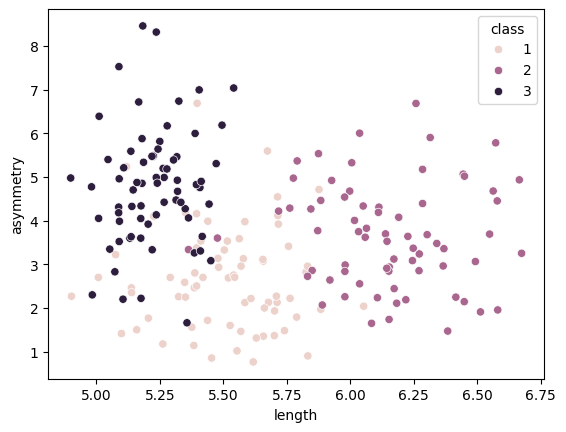

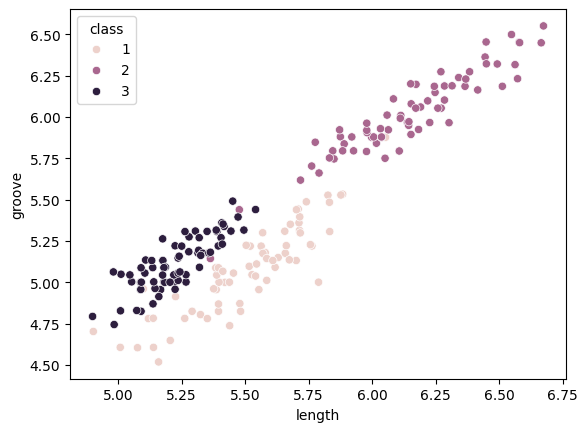

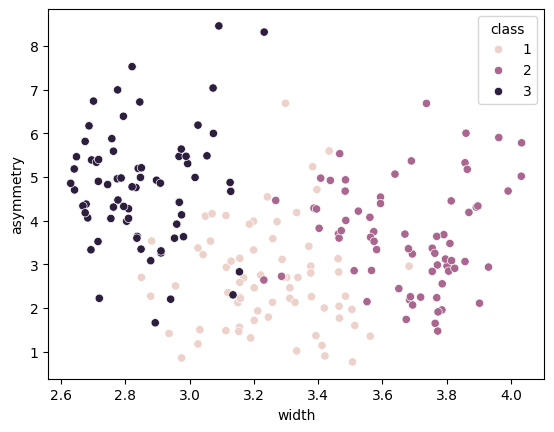

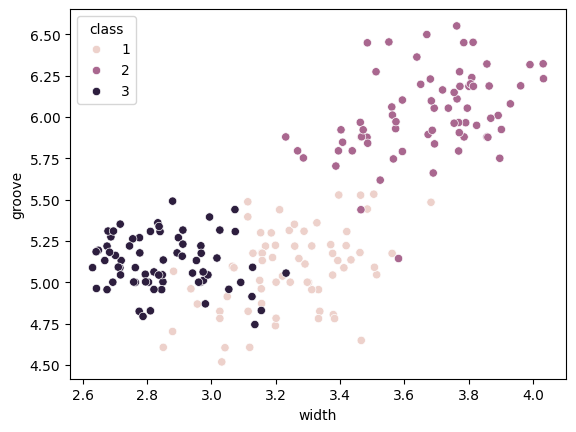

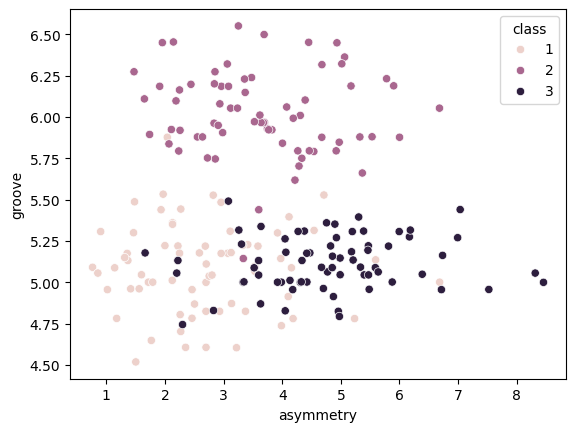

In [ ]:
for i in range(len(cols)-1):
  for j in range(i+1, len(cols)-1):
    x_label = cols[i]
    y_label = cols[j]
    sns.scatterplot(x=x_label, y=y_label, data=df, hue='class')
    plt.show()

# Clustering

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
x = 'perimeter'
y = 'asymmetry'
x = df[[x, y]].values

In [ ]:
kmeans = KMeans(n_clusters=3).fit(x)

In [ ]:
clusters = kmeans.labels_

In [ ]:
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 1, 0, 2, 0, 0, 2, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
df['class'].values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [ ]:
perimeter_col_name = 'perimeter'
asymmetry_col_name = 'asymmetry'

# Ensure x_data refers to the actual data array for 'perimeter' and 'asymmetry'
x_data = df[[perimeter_col_name, asymmetry_col_name]].values

# Construct cluster_df with explicit string column names
cluster_df = pd.DataFrame(np.hstack((x_data, clusters.reshape(-1, 1))), columns=[perimeter_col_name, asymmetry_col_name, 'class'])

[]

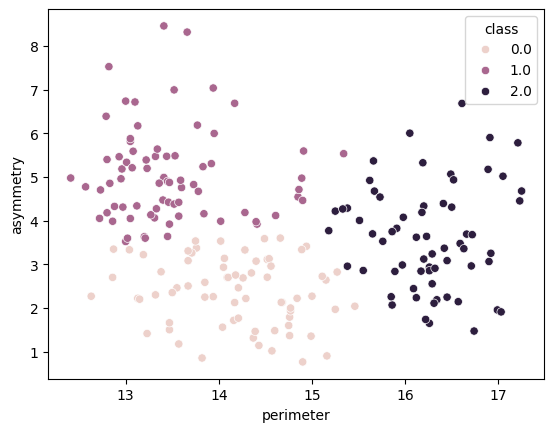

In [ ]:
# K means classes
sns.scatterplot(x='perimeter', y='asymmetry', data=cluster_df, hue='class')
plt.plot()

[]

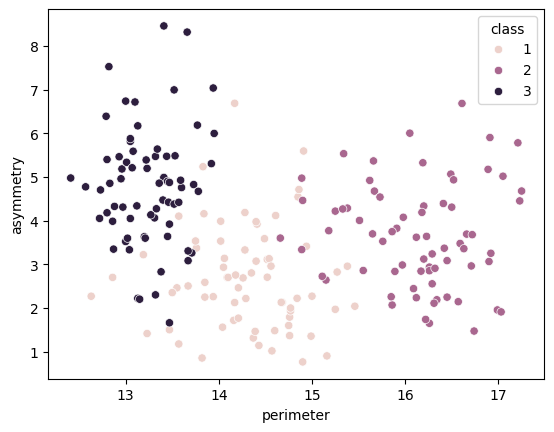

In [ ]:
# Original classes
sns.scatterplot(x='perimeter', y='asymmetry', data=df, hue='class')
plt.plot()

# Higher Dimensions

In [ ]:
x = df[cols[:-1]].values

In [ ]:
kmeans = KMeans(n_clusters=3).fit(x)
cluster_df = pd.DataFrame(np.hstack((x, clusters.reshape(-1, 1))), columns=df.columns)

[]

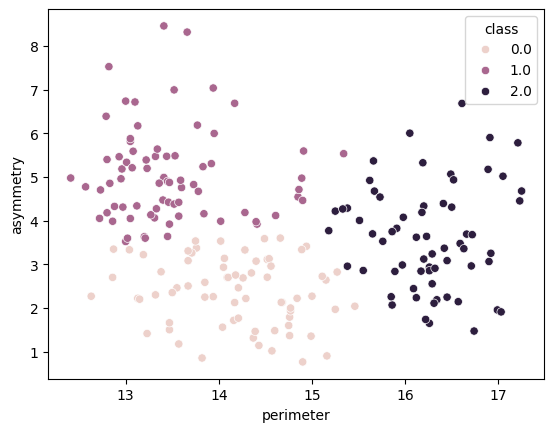

In [ ]:
# K means classes
sns.scatterplot(x='perimeter', y='asymmetry', data=cluster_df, hue='class')
plt.plot()

[]

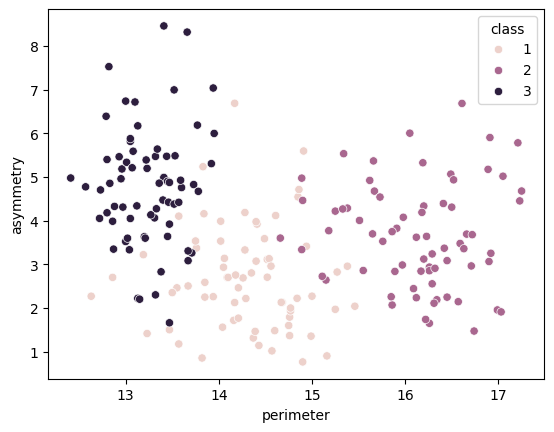

In [ ]:
# Original classes
sns.scatterplot(x='perimeter', y='asymmetry', data=df, hue='class')
plt.plot()

# PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca  = PCA(n_components=2)
transformed_x = pca.fit_transform(x)

In [ ]:
x.shape

(210, 7)

In [ ]:
transformed_x.shape

(210, 2)

In [ ]:
transformed_x[:5]

array([[ 0.66344838, -1.41732098],
       [ 0.31566651, -2.68922915],
       [-0.6604993 , -1.13150635],
       [-1.0552759 , -1.62119002],
       [ 1.61999921, -2.18338442]])

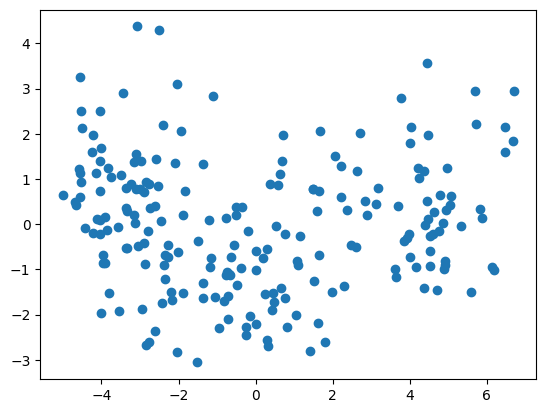

In [ ]:
plt.scatter(transformed_x[:, 0], transformed_x[:, 1])
plt.show()

In [ ]:
kmeans_pca_df = pd.DataFrame(np.hstack((transformed_x, kmeans.labels_.reshape(-1, 1))), columns=['pca1', 'pca2', 'class'])

In [ ]:
truth_pca_df = pd.DataFrame(np.hstack((transformed_x, df['class'].values.reshape(-1, 1))), columns=['pca1', 'pca2', 'class'])

[]

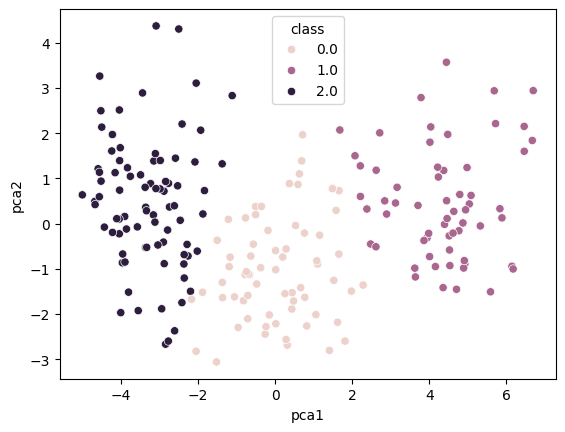

In [ ]:
# K means classes
sns.scatterplot(x='pca1', y='pca2', data=kmeans_pca_df, hue='class')
plt.plot()

[]

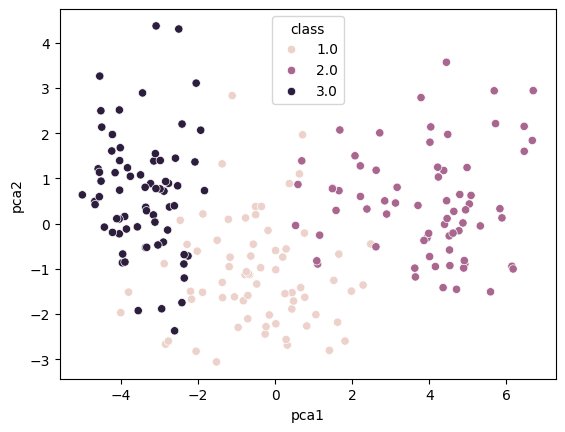

In [ ]:
# Truth classes
sns.scatterplot(x='pca1', y='pca2', data=truth_pca_df, hue='class')
plt.plot()